In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [5]:
# List of momentum values for each optimizer
momentum_values_sgd = [0.0, 0.5, 0.9]
momentum_values_rmsprop = [0.0, 0.5, 0.9]
beta1_values_adam = [0.0, 0.5, 0.9]

In [6]:
# Lists to store history of each optimizer
sgd_history_list = []
adam_history_list = []
rmsprop_history_list = []

In [7]:
# Train models with different optimizers and momentum values
for momentum_val in momentum_values_sgd:
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum_val)
    sgd_model = create_cnn_model()
    sgd_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    sgd_history = sgd_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
    sgd_history_list.append(sgd_history)

for momentum_val in momentum_values_rmsprop:
    rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=momentum_val)
    rmsprop_model = create_cnn_model()
    rmsprop_model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
    rmsprop_history_list.append(rmsprop_history)

for beta1_val in beta1_values_adam:
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1_val)
    adam_model = create_cnn_model()
    adam_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    adam_history = adam_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
    adam_history_list.append(adam_history)



Epoch 1/25
782/782 [==============================] - 20s 25ms/step - loss: 2.2409 - accuracy: 0.1718 - val_loss: 2.0335 - val_accuracy: 0.2625
Epoch 2/25
782/782 [==============================] - 20s 26ms/step - loss: 1.9618 - accuracy: 0.2855 - val_loss: 1.8673 - val_accuracy: 0.3384
Epoch 3/25
782/782 [==============================] - 20s 25ms/step - loss: 1.7829 - accuracy: 0.3625 - val_loss: 1.7193 - val_accuracy: 0.3800
Epoch 4/25
782/782 [==============================] - 19s 24ms/step - loss: 1.6045 - accuracy: 0.4228 - val_loss: 1.5246 - val_accuracy: 0.4489
Epoch 5/25
782/782 [==============================] - 19s 24ms/step - loss: 1.4828 - accuracy: 0.4660 - val_loss: 1.5525 - val_accuracy: 0.4444
Epoch 6/25
782/782 [==============================] - 19s 24ms/step - loss: 1.3996 - accuracy: 0.4995 - val_loss: 1.5809 - val_accuracy: 0.4485
Epoch 7/25
782/782 [==============================] - 19s 25ms/step - loss: 1.3325 - accuracy: 0.5276 - val_loss: 1.3447 - val_accuracy:

Epoch 8/25
782/782 [==============================] - 19s 24ms/step - loss: 0.5731 - accuracy: 0.7972 - val_loss: 0.9481 - val_accuracy: 0.7018
Epoch 9/25
782/782 [==============================] - 19s 24ms/step - loss: 0.5026 - accuracy: 0.8217 - val_loss: 0.9338 - val_accuracy: 0.7055
Epoch 10/25
782/782 [==============================] - 19s 24ms/step - loss: 0.4199 - accuracy: 0.8516 - val_loss: 1.0207 - val_accuracy: 0.6915
Epoch 11/25
782/782 [==============================] - 19s 24ms/step - loss: 0.3579 - accuracy: 0.8736 - val_loss: 1.1241 - val_accuracy: 0.6956
Epoch 12/25
782/782 [==============================] - 19s 24ms/step - loss: 0.3019 - accuracy: 0.8930 - val_loss: 1.1833 - val_accuracy: 0.7006
Epoch 13/25
782/782 [==============================] - 19s 24ms/step - loss: 0.2535 - accuracy: 0.9100 - val_loss: 1.2517 - val_accuracy: 0.6929
Epoch 14/25
782/782 [==============================] - 19s 24ms/step - loss: 0.2246 - accuracy: 0.9191 - val_loss: 1.3810 - val_accu

Epoch 21/25
782/782 [==============================] - 21s 27ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 2.5658 - val_accuracy: 0.6460
Epoch 22/25
782/782 [==============================] - 21s 27ms/step - loss: 0.0698 - accuracy: 0.9760 - val_loss: 2.6641 - val_accuracy: 0.6609
Epoch 23/25
782/782 [==============================] - 20s 26ms/step - loss: 0.0814 - accuracy: 0.9724 - val_loss: 2.2938 - val_accuracy: 0.6993
Epoch 24/25
782/782 [==============================] - 21s 27ms/step - loss: 0.0689 - accuracy: 0.9778 - val_loss: 2.2709 - val_accuracy: 0.6997
Epoch 25/25
782/782 [==============================] - 23s 30ms/step - loss: 0.0691 - accuracy: 0.9773 - val_loss: 2.3406 - val_accuracy: 0.6918
Epoch 1/25
782/782 [==============================] - 24s 30ms/step - loss: 1.4844 - accuracy: 0.4596 - val_loss: 1.1723 - val_accuracy: 0.5787
Epoch 2/25
782/782 [==============================] - 22s 28ms/step - loss: 1.0634 - accuracy: 0.6255 - val_loss: 1.2263 - val_accu

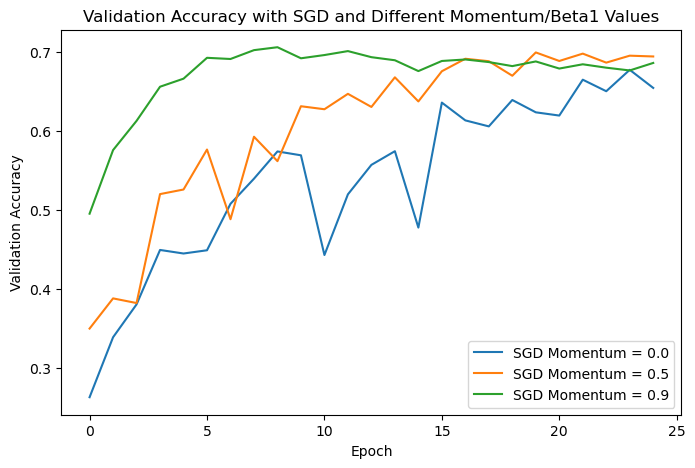

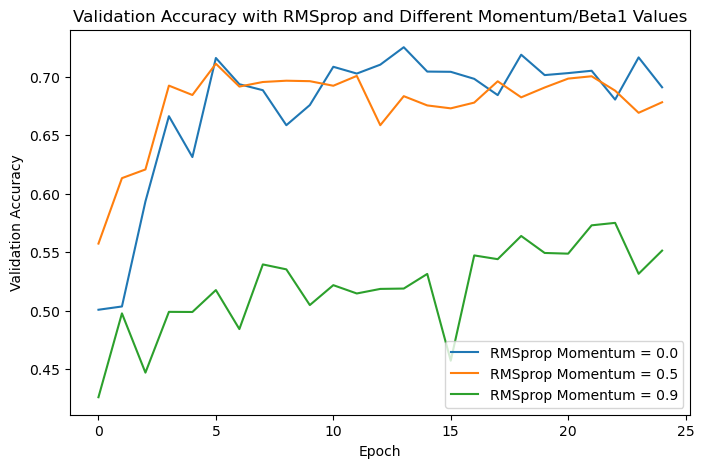

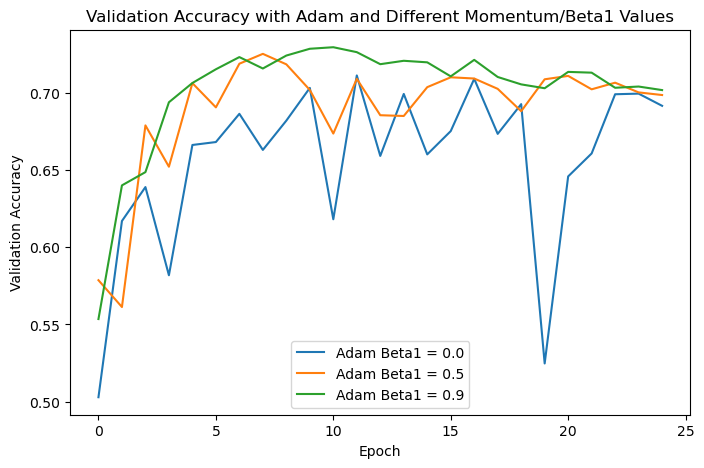

In [8]:
# Function to plot accuracy for different optimizers and momentum values
def plot_accuracy(history_list, momentum_values, optimizer_name):
    plt.figure(figsize=(8, 5))
    for i, history in enumerate(history_list):
        plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Momentum = {momentum_values[i]}' if optimizer_name == 'SGD' or optimizer_name == 'RMSprop' else f'{optimizer_name} Beta1 = {momentum_values[i]}')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy with {optimizer_name} and Different Momentum/Beta1 Values')
    plt.legend()
    plt.show()

plot_accuracy(sgd_history_list, momentum_values_sgd, 'SGD')
plot_accuracy(rmsprop_history_list, momentum_values_rmsprop, 'RMSprop')
plot_accuracy(adam_history_list, beta1_values_adam, 'Adam')

In [1]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

NameError: name 'cifar10' is not defined

In [2]:
# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

NameError: name 'train_images' is not defined

In [ ]:
# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
def create_cnn_model(regularizer=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Define L2 regularization strength
l2_strength = 0.001

In [ ]:
# Create models with L2 regularization for each optimizer
sgd_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
adam_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
rmsprop_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))

In [ ]:
# Compile models with different optimizers
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train models
sgd_history = sgd_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
adam_history = adam_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))

In [ ]:
# Evaluate models
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("SGD Optimizer:")
evaluate_model(sgd_model, test_images, test_labels)

print("Adam Optimizer:")
evaluate_model(adam_model, test_images, test_labels)

print("RMSprop Optimizer:")
evaluate_model(rmsprop_model, test_images, test_labels)

In [ ]:
Enhancing the generalization of the models by adding L2 regularization to the Conv2D layers lowers the danger of overfitting and may even improve the performance of the models on unobserved data.
When developing deep learning models, it is a valuable strategy to take into account, especially when working with challenging datasets or sparse training data.

In [ ]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# One-hot encode the labels
num_classes = 10
train_labels_preprocessed = to_categorical(train_labels, num_classes)
test_labels_preprocessed = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# Data Preprocessing
# Normalize pixel values to range [0, 1]
train_images_preprocessed, test_images_preprocessed = train_images / 255.0, test_images / 255.0

In [ ]:
# Without Data Preprocessing
train_images_no_preprocessing, test_images_no_preprocessing = train_images, test_images
train_labels_no_preprocessing = tf.squeeze(train_labels)  # Remove extra dimensions from one-hot encoding
test_labels_no_preprocessing = tf.squeeze(test_labels)

In [ ]:
# Create models without preprocessing and compile them
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create models with preprocessing and compile them
model_preprocessing = create_cnn_model()
model_preprocessing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train models
history_no_preprocessing = model_no_preprocessing.fit(train_images_no_preprocessing, train_labels_no_preprocessing, epochs=60, batch_size=64, validation_data=(test_images_no_preprocessing, test_labels_no_preprocessing))
history_preprocessing = model_preprocessing.fit(train_images_preprocessed, train_labels_preprocessed, epochs=60, batch_size=64, validation_data=(test_images_preprocessed, test_labels_preprocessed))

In [ ]:
# Evaluate models
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("Without Data Preprocessing:")
evaluate_model(model_no_preprocessing, test_images_no_preprocessing, test_labels_no_preprocessing)

print("With Data Preprocessing:")
evaluate_model(model_preprocessing, test_images_preprocessed, test_labels_preprocessed)

In [ ]:
Without data preparation

Test precision: 0.6362
Reason: In this instance, the model is trained using only the unprocessed raw pixel values from the CIFAR-10 photos.
The tests attained accuracy is roughly 63.62%. Preprocessing may have improved the models ability to learn the underlying patterns in the data, leading to higher accuracy.


Utilizing Data Preprocessing

Test precision: 0.6928
Reason: In this instance, preprocessing the CIFAR-10 images is done before training the model.
Preprocessing often include implementing further modifications, such as scaling or data augmentation, as well as normalizing pixel values to a range of [0, 1].
The model has acquired more pertinent characteristics and patterns through data preprocessing, increasing accuracy by about 69.28%. The model performs better on new data and generalizes more readily as a result of data preparation.

In [ ]:
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# One-hot encode the labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
# Define the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile and train the model with different optimizers
optimizers = ['sgd', 'adam', 'rmsprop']
histories = []

for optimizer_name in optimizers:
    model = create_cnn_model()
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_data=(test_images, test_labels))
    histories.append(history)

In [ ]:
# Evaluate models and print test accuracies
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    return accuracy

test_accuracies = []
for i, optimizer_name in enumerate(optimizers):
    test_accuracy = evaluate_model(histories[i].model, test_images, test_labels)
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy with {optimizer_name} optimizer: {test_accuracy}")

In [ ]:
# Find the optimizer with the best accuracy
best_optimizer = optimizers[test_accuracies.index(max(test_accuracies))]
print(f"\nBest optimizer based on test accuracy: {best_optimizer}")

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
    plt.plot(histories[i].history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['loss'], label=f'Training Loss ({optimizer_name})')
    plt.plot(histories[i].history['val_loss'], label=f'Validation Loss ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#